In [2]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

MASK_DIR = "../masks/" # Need to downlowd the masks
DATA_DIR = "../data/"
TRAIN_FILE = "../train.txt"
TEST_FILE = "../test.txt"



Populating the interactive namespace from numpy and matplotlib


In [3]:
def read_file(file_name):
    f = open(file_name, "r")
    return f.read().split()

In [4]:
train_hash = read_file(TRAIN_FILE)
small_train_hash = train_hash[:5]

In [5]:
# The selected trainsets.
print small_train_hash

['4bad52d5ef5f68e87523ba40aa870494a63c318da7ec7609e486e62f7f7a25e8', 'a7e37600a431fa6d6023514df87cfc8bb5ec028fb6346a10c2ececc563cc5423', '70a6300a00dbac92be9238252ee2a75c86faf4729f3ef267688ab859eed1cc60', 'd748ad5c033a781c65f7072ebd385c9ec9565ab3549621034a79817b03d9cf34', 'afb2bde7547587d548ba007b890364724886612df3d795360176bafc55752c1c']


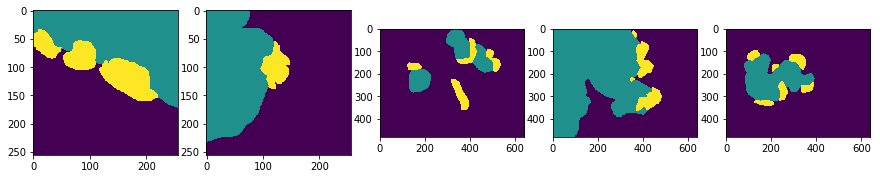

In [6]:
# reading masks
plt.figure(figsize = [15,10])
for i in range(len(small_train_hash)):
    img=mpimg.imread(MASK_DIR + small_train_hash[i] + ".png")
    plt.subplot(1,5,i+1)
    imgplot = plt.imshow(img)
plt.show()

In [7]:
# downloading data for the first 5 videos

import subprocess
for i in range(len(small_train_hash)):
    subprocess.call("../../google-cloud-sdk/bin/gsutil cp gs://uga-dsp/project2/data/" + small_train_hash[i] + ".tar " + DATA_DIR, shell=True)

# extracting images for the first 5 videos

import tarfile
for i in range(len(small_train_hash)):
    tar=tarfile.open(DATA_DIR + small_train_hash[i] + ".tar")
    tar.extractall("../")
    tar.close()

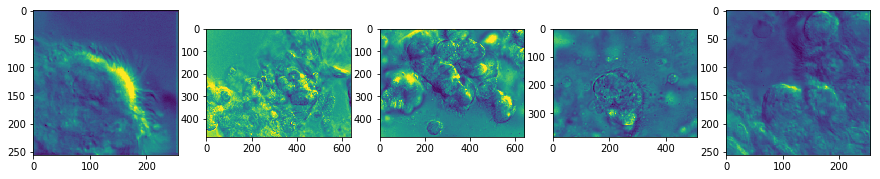

In [28]:
# reading videos
plt.figure(figsize = [15,10])
for i in range(len(small_train_hash)):
    img=mpimg.imread(DATA_DIR + small_train_hash[i] + "/frame0000.png")
    plt.subplot(1,5,i+1)
    imgplot = plt.imshow(img)
plt.show()

In [32]:
import cv2

for i in range(len(small_train_hash)):
    image_folder = DATA_DIR + small_train_hash[i]
    video_name = 'video.avi'

    images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
    frame = cv2.imread(os.path.join(image_folder, images[0]))
    height, width, layers = frame.shape

    video = cv2.VideoWriter(os.path.join(image_folder, video_name), 0, 3, (width,height))

    for image in images:
        video.write(cv2.imread(os.path.join(image_folder, image)))

    cv2.destroyAllWindows()
    video.release()

In [ ]:
# Using the first training video as example:
image_folder = DATA_DIR + small_train_hash[i]
images = [img for img in os.listdir(image_folder) if img.endswith(".png")]
